In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A Support Vector Machine (SVM) is a powerful and versatile Machine Learning
model, capable of performing linear or nonlinear classification, regression, and even
outlier detection.
## Linear SVM Classification
The two
classes can clearly be separated easily with a straight line (they are linearly separable).

decision boundary of an SVM classifier not only separates the two classes but also stays as far away from the
closest training instances as possible. You can think of an SVM classifier as fitting the
widest possible street (represented by the parallel dashed lines) between the classes.
This is called large margin classification.

[0, 5.5, 0, 2]

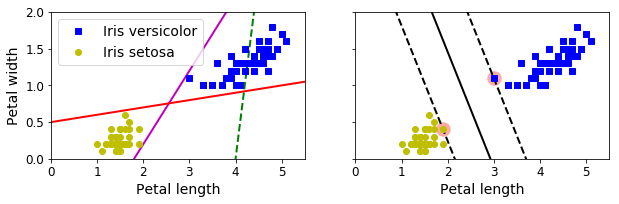

In [4]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

Notice that adding more training instances “off the street” will not affect the decision
boundary at all: it is fully determined (or “supported”) by the instances located on the
edge of the street. These instances are called the support vectors.

SVMs are sensitive to the feature scales .**Means feature scaling is very much required .**


Text(0.5, 1.0, 'Scaled')

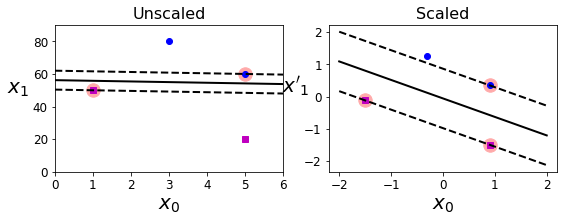

In [5]:

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)

### Soft & Hard Margin Classification
If we strictly impose that all instances must be off the street and on the right side, this
is called hard margin classification.

There are two main issues with hard margin classification.
First, it only works if the data is linearly separable. Second, it is sensitive to
outliers.

To avoid these issues, use a more flexible model. The objective is to find a good balance
between keeping the street as large as possible and limiting the margin violations
(i.e., instances that end up in the middle of the street or even on the wrong side). This
is called soft margin classification.

When creating an SVM model using Scikit-Learn, we can specify a number of hyperparameters.
**C is one of those hyperparameters. Margin violations are bad.** It’s usually better to have few of them. 
If your SVM model is overfitting, you can try regularizing it by
reducing C.

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**Instead of using the LinearSVC class, we could use the SVC class with a linear kernel.**
When creating the SVC model, we would write SVC(kernel="linear", C=1). Or we
could use the SGDClassifier class, with SGDClassifier(loss="hinge", alpha=1/
(m*C)). This applies regular Stochastic Gradient Descent to train a
linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be
useful to handle online classification tasks or huge datasets that do not fit in memory
(out-of-core training).

The LinearSVC class regularizes the bias term, so you should center
the training set first by subtracting its mean. This is automatic if
you **scale the data using the StandardScaler. Also make sure you
set the loss hyperparameter to "hinge"**, as it is not the default
value. Finally, for better performance, you should set the **dual
hyperparameter to False**, unless there are more features than
training instances

In [8]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [9]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Text(0.5, 1.0, '$C = 100$')

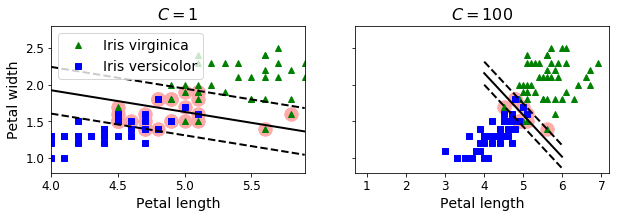

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)

## Nonlinear SVM Classification

One approach to
handling nonlinear datasets is to add more features, such as polynomial features.in some cases this can result in a linearly separable dataset.

In [11]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

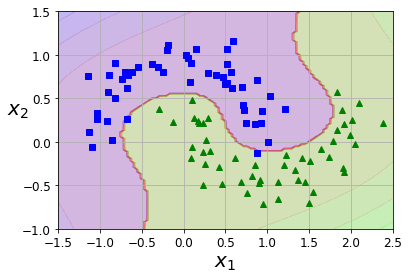

In [13]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### Polynomial Kernel
at a low polynomial
degree, this method cannot deal with very complex datasets, and with a high polynomial
degree it creates a huge number of features, making the model too slow.

Fortunately, when using SVMs you can appl kernel trick . The kernel trick makes it
possible to get the same result as if you had added many polynomial features, even
with very high-degree polynomials, without actually having to add them. So there is
no combinatorial explosion of the number of features because you don’t actually add
any features.

In [14]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Obviously, if your model is overfitting, you might want to
reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing
it. The hyperparameter coef0 controls how much the model is influenced by highdegree
polynomials versus low-degree polynomials.
### Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a
**similarity function, which measures how much each instance resembles a particular
landmark.**

similarity function to be the Gaussian Radial Basis Function (RBF) ϕγ (x, ℓ) = exp( −γ * ∥ x − ℓ ∥^2 )

### Gaussian RBF Kernel
Just like the polynomial features method, the similarity features method can be useful
with any Machine Learning algorithm, but it may be computationally expensive to
compute all the additional features, especially on large training sets.

hyperparameters gamma (γ) and C.

In [16]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Increasing gamma
makes the bell-shaped curve narrower . As a
result, each instance’s range of influence is smaller: the decision boundary ends up
being more irregular, wiggling around individual instances. Conversely, a small gamma
value makes the bell-shaped curve wider: instances have a larger range of influence,
and the decision boundary ends up smoother. **So γ acts like a regularization.hyperparameter: if your model is overfitting, you should reduce it; if it is underfitting,
you should increase it (similar to the C hyperparameter).**

String kernels are sometimes used when classifying text documents
or DNA sequences.

#### With so many kernels to choose from, how can you decide whichone to use?
As a rule of thumb, you should always try the linear
kernel first (remember that LinearSVC is much faster than SVC(ker
nel="linear")), especially if the training set is very large or if it
has plenty of features. If the training set is not too large, you should
also try the Gaussian RBF kernel; it works well in most cases. Then
if you have spare time and computing power, you can experiment
with a few other kernels, using cross-validation and grid search.

#### Computational Complexity
LinearSVC does not support the kernel trick, but it scales
almost linearly with the number of training instances and the number of features. Its
training time complexity is roughly O(m × n).The algorithm takes longer if you require very high precision. This is controlled by
the tolerance hyperparameter ϵ (called tol in Scikit-Learn). In most classification
tasks, the default tolerance is fine.

SVC class raining time complexity is usually between O(m2 × n)
and O(m3 × n). Unfortunately, this means that it gets dreadfully slow when the number
of training instances gets large (e.g., hundreds of thousands of instances). This
algorithm is perfect for complex small or medium-sized training sets. It scales well
with the number of features, especially with sparse features (i.e., when each instance
has few nonzero features

## SVM Regression
SVM algorithm is versatile: not only does it support linear
and nonlinear classification, but it also supports linear and nonlinear regression.

**instead of trying to fit the largest possible street between two classes while limiting
margin violations, SVM Regression tries to fit as many instances as possible on the
street while limiting margin violations (i.e., instances off the street). The width of the
street is controlled by a hyperparameter, ϵ.**
Adding more training instances within the margin does not affect the model’s predictions;
thus, the model is said to be ϵ-insensitive.

In [17]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

Text(0.5, 1.0, '$\\epsilon = 0.5$')

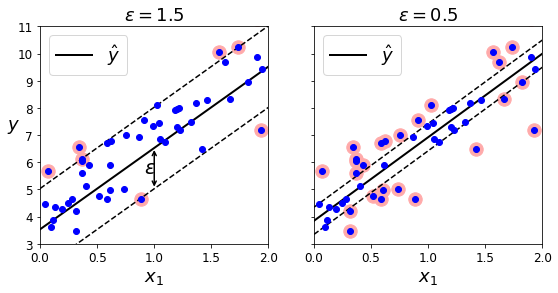

In [19]:

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

**To tackle nonlinear regression tasks, you can use a kernelized SVM model.
. There is little regularization  in 
large C value, and much more regularization in small C value.**

In [24]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0.5, 1.0, '$degree=2, C=0.01, \\epsilon = 0.1$')

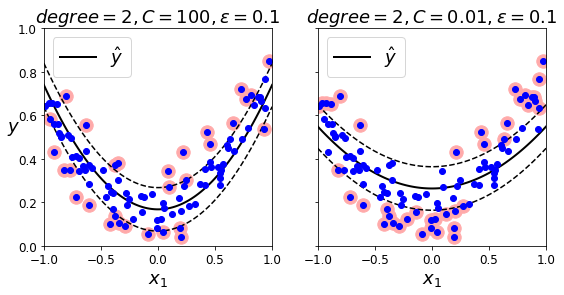

In [26]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

## Under the hood
Training a linear SVM classifier means finding the values of w and b
that make this margin as wide as possible while avoiding margin violations (hard
margin) or limiting them (soft margin).
### Training Objective
Consider the slope of the decision function: it is equal to the norm of the weight vector,
∥ w ∥. If we divide this slope by 2, the points where the decision function is equal
to ±1 are going to be twice as far away from the decision boundary. In other words,
dividing the slope by 2 will multiply the margin by 2.**The smaller the weight vector w, the larger the
margin**

So we want to minimize ∥ w ∥ to get a large margin. If we also want to avoid any
margin violations (hard margin), then we need the decision function to be greater
than 1 for all positive training instances and lower than –1 for negative training
instances.We can therefore express the hard margin linear SVM classifier objective as the constrained
optimization problem.

To get the soft margin objective, we need to introduce a slack variable ζ(i) ≥ 0 for each
instance: ζ(i) measures how much the ith instance is allowed to violate the margin. We
now have two conflicting objectives: make the slack variables as small as possible to
reduce the margin violations, and make (½ w⊺. w) as small as possible to increase the
margin. **This is where the C hyperparameter comes in: it allows us to define the tradeoff
between these two objectives.**
### Quadratic Programming
The hard margin and soft margin problems are both convex quadratic optimization
problems with linear constraints. Such problems are known as Quadratic Programming
(QP) problems
### The Dual Problem
Given a constrained optimization problem, known aThe dual problem is faster to solve than the primal one when the number of training
instances is smaller than the number of features. More importantly, the dual problem
makes the kernel trick possible, while the primal does not.s the primal problem, it is possible
to express a different but closely related problem, called its dual problem.solution to the dual problem typically gives a lower bound to the solution of the primal
problem, but under some conditions it can have the same solution as the primal
problem. Luckily, the SVM problem happens to meet these conditions,6 so you can
choose to solve the primal problem or the dual problem; both will have the same solution.The dual problem is faster to solve than the primal one when the number of training
instances is smaller than the number of features. More importantly, the dual problem
makes the kernel trick possible, while the primal does not.

### Mercer Theorem

According to Mercer’s theorem, ***if a function K(a, b) respects a few mathematical conditions
called Mercer’s conditions (e.g., K must be continuous and symmetric in its
arguments so that K(a, b) = K(b, a), etc.), then there exists a function ϕ that maps a
and b into another space (possibly with much higher dimensions) such that K(a, b) =
ϕ(a)⊺ ϕ(b). You can use K as a kernel because you know ϕ exists, even if you don’t
know what ϕ is.*** In the case of the Gaussian RBF kernel, it can be shown that ϕ maps
each training instance to an infinite-dimensional space, so it’s a good thing you don’t
need to actually perform the mapping!
Note that some frequently used kernels (such as the sigmoid kernel) don’t respect all
of Mercer’s conditions, yet they generally work well in practice.

## Online SVMs
For linear SVM classifiers, one method for implementing an online SVM classifier is
to use Gradient Descent (e.g., using SGDClassifier) to minimize the cost function in
Equation 5-13, which is derived from the primal problem. Unfortunately, Gradient
Descent converges much more slowly than the methods based on QP.
J( w, b) = (1/2)
w⊺w + C Σ i = 1 to
m,
max( 0, 1 − t (i)( w⊺x (i) + b))

The **first sum in the cost function will push the model to have a small weight vector
w, leading to a larger margin. The second sum computes the total of all margin violations.**
An instance’s margin violation is equal to 0 if it is located off the street and on
the correct side, or else it is proportional to the distance to the correct side of the
street. Minimizing this term ensures that the model makes the margin violations as
small and as few as possible

## HInge Loss

The function **max(0, 1 – t) is called the hinge loss function** .
It is equal to 0 when t ≥ 1. Its derivative (slope) is equal to –1 if t < 1 and 0 if t > 1. It is
not differentiable at t = 1, but just like for Lasso Regression , you can still use Gradient Descent using any subderivative at t = 1 (i.e.,
any value between –1 and 0).